In [52]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv("Arranged Data.csv")
Z = data.pop("Z")
A = data.pop("A")
y = data.pop("Binding")
BE_A = data.pop("BE/A")

In [54]:
w_init = np.array((1,1,1,1,1))
train_Z = np.array(Z[0:2680])
train_A = np.array(A[0:2680])
train_y = np.array(y[0:2680])


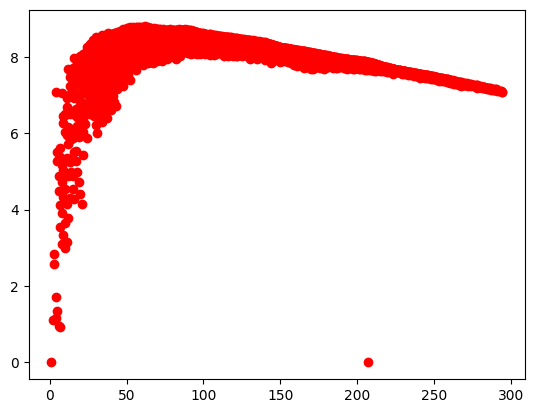

In [55]:
plt.scatter(A, BE_A, color="red")
plt.show()

In [56]:
for i in range(3):
    print(train_A[i], train_Z[i], train_y[i])
    print("\n")

1 1 0.0


207 90 0.207


2 1 2.2245662




In [57]:
def compute_cost(A, Z, y, w):
    #Double check calculations manually to ensure no mistakes were made.
    m = A.shape[0]

    cost = 0.0  
    for i in range(m):
        # Create the vector of the x values in the equation.
        vec_x = np.array( ( A[i], A[i]**(2/3), (Z[i]*(Z[i]-1))/(A[i]**(1/3)), ((A[i]-2*Z[i])**2)/(A[i]**2), 1/(A[i]**(1/2)) ))
        #Logic for the pairing terms
        if Z[i] % 2 == 0 and (A[i]-Z[i]) % 2 ==0:
            vec_x[-1] = vec_x[-1]
        elif Z[i] % 2 != 0 and (A[i]-Z[i]) % 2 !=0:
            vec_x[-1] = -1*vec_x[-1]
        else:
            vec_x[-1] = 0
        # print(vec_x[-1])
        # Calculates the actual function using the dot product.
        # must code calculations manually instead of using dot product.
        f = vec_x[0] * w[0] - vec_x[1] * w[1] - vec_x[2] * w[2] - vec_x[3] * w[3]
        # f = np.dot(vec_x, w)
        #computes cost
        cost = np.longdouble(cost + np.power(f-y[i],2))
    return cost/(2*m)
compute_cost(train_A, train_Z, train_y, w_init)


1236571.2760822831

In [58]:
def compute_gradient(A, Z, y, w_init):
    m = A.shape[0]
    gradient = 0.0  
    for i in range(m):
        # print(train_A[i], train_Z[i], train_y[i])
        # Create the vector of the x values in the equation.
        vec_x = np.array( ( A[i], A[i]**(2/3), (Z[i]*(Z[i]-1))/(A[i]**(1/3)), ((A[i]-2*Z[i])**2)/(A[i]**2), 1/(A[i]**(1/2)) ))
        #Logic for the pairing terms
        if Z[i] % 2 == 0 and (A[i]-Z[i]) % 2 ==0:
            vec_x[-1] = vec_x[-1]
        elif Z[i] % 2 != 0 and (A[i]-Z[i]) % 2 !=0:
            vec_x[-1] = -1*vec_x[-1]
        else:
            vec_x[-1] = 0
        # print(vec_x[-1])
        # print(vec_x)
        # must code calculations manually instead of using dot product.
        f = (vec_x[0] * w_init[0] - vec_x[1] * w_init[1] - vec_x[2] * w_init[2] - vec_x[3] * w_init[3] + w_init[4]*vec_x[4])
        # print("f:", f)
        # part of the derivative
        tmp = (vec_x[0] - vec_x[1] - vec_x[2] - vec_x[3] + vec_x[4])
        # print(tmp)
        #computes gradient = (f-y[i])*f'
        gradient = gradient + ((f-y[i]) * tmp)
        #gradient/m gives us the derivative
    return gradient/(m)
#Do manual calculations to determine if the code is running correctly. Seems about right
compute_gradient(train_A, train_Z, train_y, w_init)
#698783.5692979245
#s

858964.4859171127

In [59]:
def BE (W):
    A = train_A
    Z = train_Z
    y = train_y
    m = A.shape[0]
    f = 0
    BE = []
    for i in range(m):        
        vec_x = np.array( ( A[i], A[i]**(2/3), (Z[i]*(Z[i]-1))/(A[i]**(1/3)), ((A[i]-2*Z[i])**2)/(A[i]**2), 1/(A[i]**(1/2)) ))
        if Z[i] % 2 == 0 and (A[i]-Z[i]) % 2 ==0:
            vec_x[-1] = vec_x[-1]
        elif Z[i] % 2 != 0 and (A[i]-Z[i]) % 2 !=0:
            vec_x[-1] = -1*vec_x[-1]
        else:
            vec_x[-1] = 0
        f = (vec_x[0] * W[0] - vec_x[1] * W[1] - vec_x[2] * W[2] - vec_x[3] * W[3] + W[4]*vec_x[4])
        BE.append(f/A[i])
    return BE
w = [15.75, 17.8, 0.711, 23.7,11.18  ]
c = BE(w)
print()


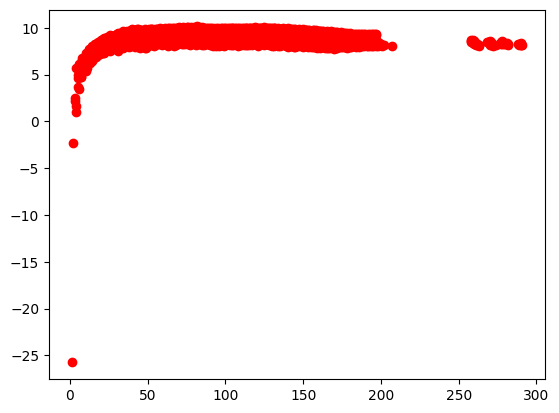

In [60]:
plt.scatter(train_A, c, color="red")
plt.show()

In [61]:
def gradient_descent(A, Z, y, w_in, cost_function, gradient_function,alpha):
    w = copy.deepcopy(w_in)
    i = 0
    cost = cost_function(A, Z, y, w)
    
    return cost

In [62]:
alpha = 1.0e-4
gradient_descent(train_A, train_Z, train_y, w_init, compute_cost, compute_gradient, 1)

1236571.2760822831